# Prediction of Probability of You Getting an Admit in the US for Masters
The dataset contains several arguments(basically the inputs you need to provide) which are considered for the application for Masters Programs. The parameters included are :

GRE Scores ( out of 340 ) TOEFL Scores ( out of 120 ) Under Grad University Rating ( out of 5 ) Statement of Purpose (out of 5 ) Letter of Recommendation Strength ( out of 5 ) Undergraduate GPA ( out of 10 ) Research Experience ( either 0 or 1 ) Chance of Admit ( ranging from 0 to 1 )

Dataset: https://www.kaggle.com/mohansacharya/graduate-admissions/home

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading file

In [3]:
df=pd.read_csv('Admission_Predict.csv')
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

## Dropping unnecessary columns

In [5]:
df.drop(['Serial No.','LOR '],axis=1,inplace=True)

In [6]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Research,Chance of Admit
0,337,118,4,4.5,9.65,1,0.92
1,324,107,4,4.0,8.87,1,0.76
2,316,104,3,3.0,8.00,1,0.72
3,322,110,3,3.5,8.67,1,0.80
4,314,103,2,2.0,8.21,0,0.65


## Checking for null data

In [7]:
nullrows= df.isna()
nullrows.sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Visualizing our data

#### comparing each raw with the rest

In [8]:
sns.set_style('whitegrid')

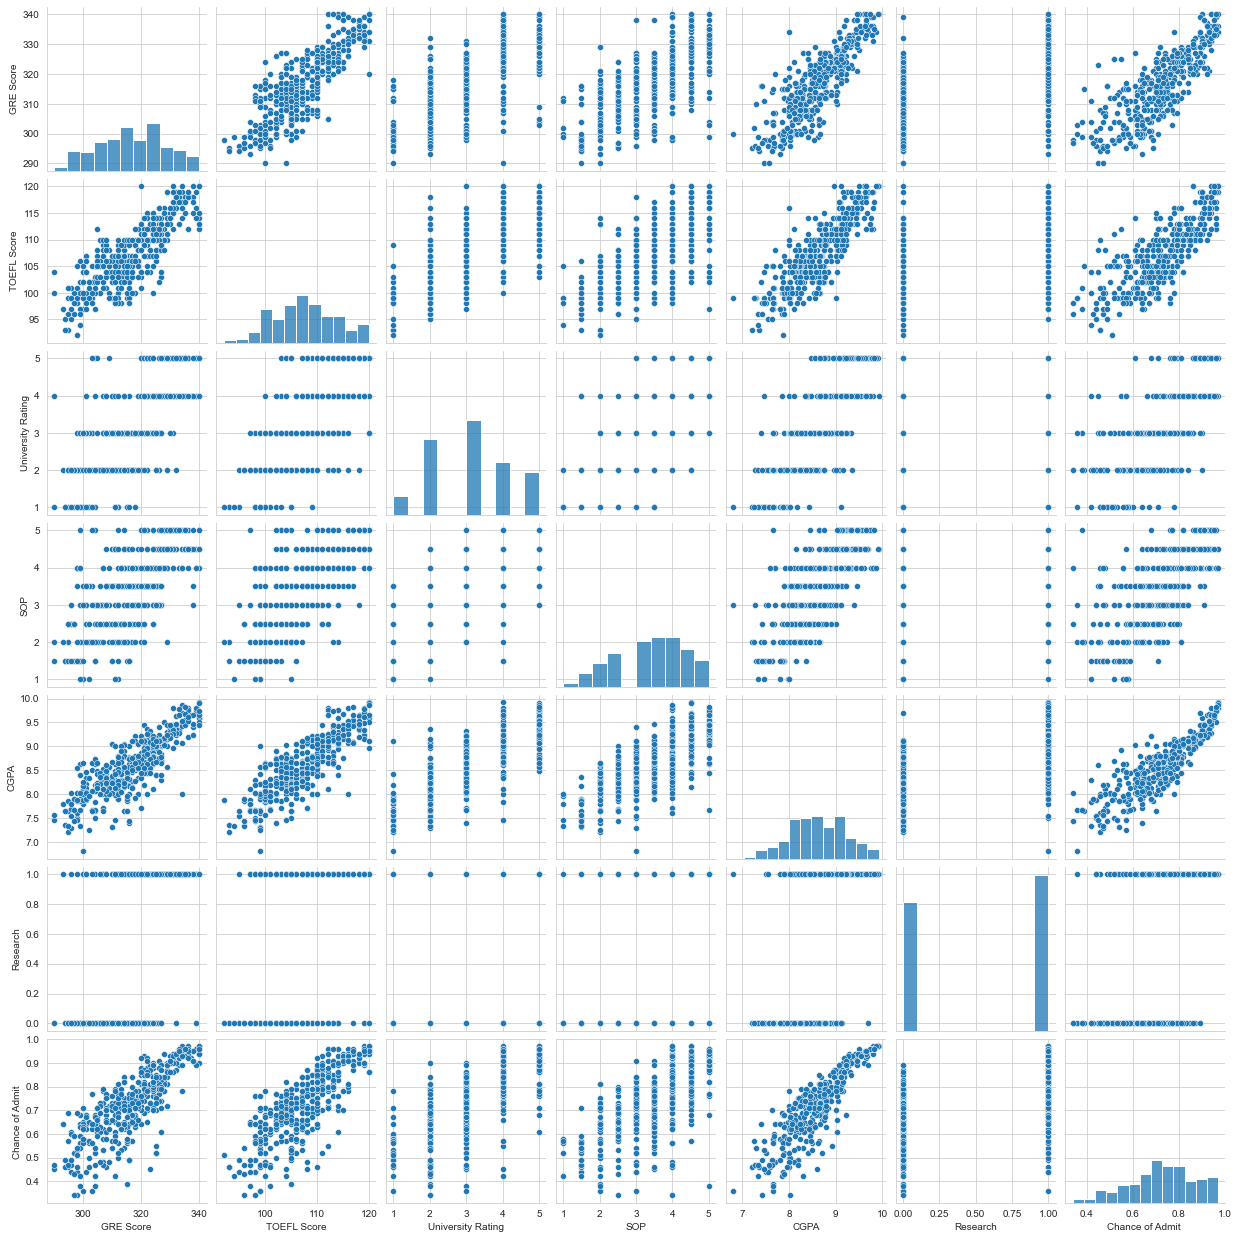

In [9]:
sns.pairplot(df)

* focusing on the last row, CGPA is the highest determinant to admission 
* focusing on the 'CGPA' row, we can presume a high GRE and TOEFL scores implies high CGPA and vice versa

<AxesSubplot:xlabel='Research', ylabel='count'>

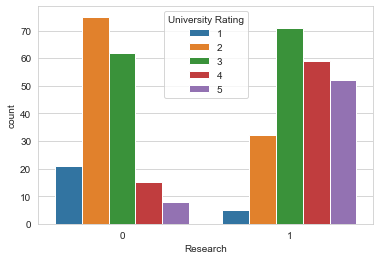

In [12]:
sns.countplot(x='Research',data=df,hue='University Rating')

* majority of student from Universities with rating > 2 engaged in research while those < 3 didn't  

## SELECTING A MODEL

### A linear regression model is selected due to 
* Target data is continous (not true or false)
* The independent variable is highly related to the dependent (y = mx + c)
* It is a supervised model

In [14]:
X=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit ']

#### Spliting the data

In [22]:
from sklearn.model_selection import train_test_split,cross_val_score

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

#### Developing the model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm=LinearRegression()

#### training the model

In [21]:
lm.fit(X_train,y_train)

LinearRegression()

In [26]:
scorearray=cross_val_score(lm,X_train,y_train,cv=10) #10 k-folds
print('mean score',np.mean(scorearray))
print('standard deviation',np.std(scorearray))

mean score 0.7272886957861342
standard deviation 0.1368431869938677


* a mean score btn 0 and 1 implies it is neither an overfit or underfit

#### testing with the test data

In [29]:
prediction=lm.predict(X_test)

In [50]:
accuracy=lm.score(X_test,y_test)
print(f'model has accuracy of {round(accuracy*100,2)}%')

model has accuracy of 82.49%


#### using the model to predict user data

In [51]:
user_data=[[300,102,3,4.0,8.87,1]]

predicted=lm.predict(user_data)

print(f'you have a { np.round(predicted*100,2) }% chance of being admitted')

you have a [73.29]% chance of being admitted
